# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong, Huk Wang
Frontiers, January 2007, 26(4):1212-1328


Previous studies have implicated a correlation between ramping spike activity in LIP cortial neurons and behavioural responses of decision making (accuracy and reaction times). Here, a simplified two-variable model of a biophysically realistic cortical network is presented as a neuronal basis of temporal decision making.

# Appendix Model
## Reduced two-variable model without AMPA at recurrent synapses
The reduced two-variable model, shown in the image below, consists of two neural units recieving alternitave choice inputs, with self-excitation and reciprocal inhibition.

The model is in its simplest form if we assume that NMDA receptors primaraly give rise to excitatory reverberation ($W_+$ in image below), thus excluding AMPA and GABA_A receptors at the recurrent synapses.   

AMPA receptors are included in equations for the unidirectional synaptic inputs. 

Arrows - Excitatory connections; circles - inhibitory connections  
$1$ (blue) and $2$ (red) - two distinct neural populations  
$I_1$ and $I_2$ - input from visual motion stimulus to respective population  
$W_+$ - recurrent excitatory connections


### Calling Library Fuctions

In [1]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model
#### Firing rate / Input-output function
$$ H_i=\frac{a x_i-b}{1-exp[-d(ax_i-b)]}$$

#### Parameter values
$$ a=207 (VnC)^{-1}; \:\:  b=108Hz; \:\:d=0.154s$$



In Wang (2006), $r_i$, the firing rate, is a self-consisting nonlinear function. Rather than approximating the values itterivly in a costly computational mannor, $H_i$ is introduced as a simplification of the firing rate equation. This input-output function can be solved for any $x_i$ as defined in the neural circuit equation. Parameter values for $a$, $b$ and $d$ are chosen to fit the numerical solutions.

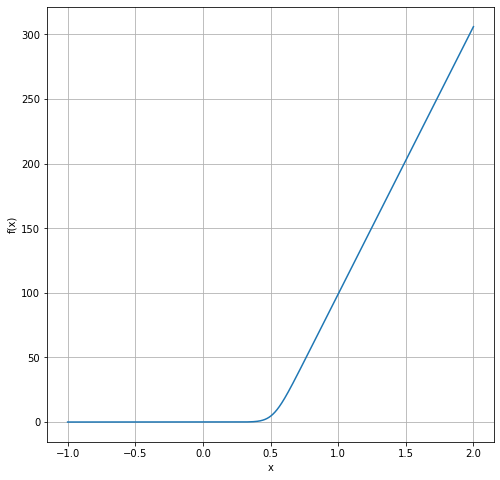

In [2]:
def f(x):
    a=207
    b=108
    d=0.154
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f

x=np.arange(-1,2,0.0001)
fig = plt.figure(figsize=(8,8))
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Plot showing evolution of firing rate variable $H(x)_i$ as a function of values of $x_i$ from $-1$ to $1$. Firing rate is a ramping function.

### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,1}$$

where the synaptic couplings are $J_{11}=0.2609$, $J_{22}=0.2609$, $J_{12}=0.0497$ and $J_{21}=0.0497$.
$I_{0}=0.3255 nA$ represents external input 


In [3]:
def total_synaptic_current(S_L,S_R,I_L,I_R,I_T,I_noise_L,I_noise_R):
    # Synaptic coupling
    J_LL=J_RR=0.3725 # nA
    J_LR=J_RL=0.1137 # nA
    x_L=J_LL*S_L-J_LR*S_R+I_T+I_L+I_noise_L
    x_R=J_RR*S_R-J_RL*S_L+I_T+I_R+I_noise_R
    return x_L, x_R


### Background activity
#### Neural noise function
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$
#### Parameters
$$ \tau_{AMPA}=2ms; \:\: \sigma_{noise}=0.02nA; \:\:\eta- Gaussian \ white \ noise  $$

Simplyfing the model removes the noise term describing input from neurons outside the chosen motion sensitive populations. Here, a background activity function, $I_{noise,i}$, is introduced conisting of Gaussian white noise with zero mean and unit variance filtered by a short (AMPA synaptic) time constant.

In [4]:
def Background_Activity(I_noise,h):
    sigma_noise=0.009 # nA
    tau_AMPA=2/1000#ms
    eta_noise=np.random.normal(0,1,1)
    I_0=0.3297  # nA
    I_noise_new=I_noise+(h)/tau_AMPA*(-(I_noise-I_0)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =\frac{-S_{i}}{\tau_S}+\big((1-S_i)\gamma H(x_i)\big)$$
$$\tau_S=100ms$$
$$\tau_S=0.1s$$
$$\gamma=0.641$$

Euler 
w_{i+1}

The equation above describes the time evolution of the reduced two-varable system of excititory populations, $i={1,2}$. 


The system is dependant on the synaptic gating variable and time constant for NMDA receptors, $S_{NMDA}$ and $\tau_{NMDA}$, denoted $S$ and $\tau_S$ here for short, as well as the input-outpuut function, $H(x_i)$ described earlier.

In [31]:
def S_diff(S,x,h):
    tau_S=0.060#100 #ms
    𝛾=0.641
    S_new=S+h*((-S/tau_S)+(1-S)*𝛾*f(x))
    return S_new

### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1\pm \frac{c'}{100} \right) $$

$$\mu=30$$ Hz- spikes per second
$$ f=1$$  Only in Wong et al 2007
$$ J_{A,ext}=5.2 \times 10^{-4}$$
$$ c' $$ Coherence


$I_i$ represents encoded motion stimulus information from the MT area. This input is dependant on the strength and direction of the cohearence, $c'$, aboslute stimulius strength $\mu_0$ and the average synaptic coupling with AMPA receptors, $J_{A,ext}$.

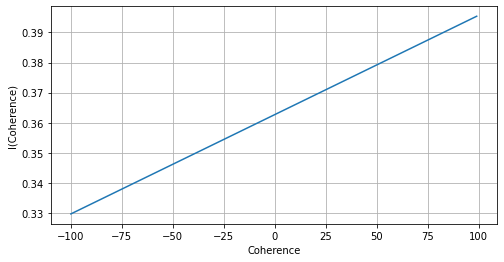

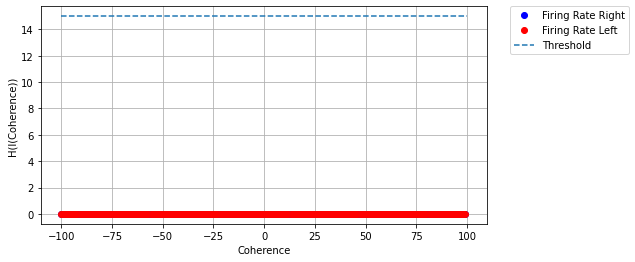

In [40]:
def I_input_1(c_dash):
    J_A_ext=1.1/1000# nA/Hz
    mu_0=30 # Hz
    f=1.0
    p=0
    I_motion=J_A_ext*mu_0*(1+f*(c_dash+p)/100)
    return I_motion

All_coh=np.arange(-100,100,1)
fig = plt.figure(figsize=(8,4))
plt.plot(All_coh,I_input_1(All_coh)+0.3297)
plt.grid()
plt.xlabel('Coherence')
plt.ylabel('I(Coherence)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig = plt.figure(figsize=(8,4))
plt.plot(All_coh,f(I_input_1(All_coh)),'ob',label='Firing Rate Right')
plt.plot(All_coh,f(I_input_1(-All_coh)),'or',label='Firing Rate Left')
plt.hlines(15,-100,100,linestyles='dashed',label='Threshold')


plt.grid()
plt.xlabel('Coherence')
plt.ylabel('H(I(Coherence))')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



# Initial Conditions
Parameter values set as per appexdix directions, based on fitting data from Roitman and Shadlen (2002).





In [41]:
h=1/1000
time=np.arange(-1,3,h) 
J_A_ext=1.1*10**-3 # nA/Hz
mu_0=30.0
I_noise_L=0.3297+0.004*np.random.normal(0,1,len(time))   # initalise noisy input as normal distribution
I_noise_R=0.3297+0.004*np.random.normal(0,1,len(time))   # why multiply by 0.004? Or how to know to do this  ?

x_L=np.ones(len(time)) #list of 40,000 values of 0.156
x_R=np.ones(len(time))
x_L[0]=J_A_ext*mu_0 #list of 40,000 values of 0.156
x_R[0]=J_A_ext*mu_0



S=0.2
S_L=S+np.random.uniform(0,0.001,len(time))  # initialise gating variables for uniform dist 
S_R=S+np.random.uniform(0,0.001,len(time))  # why does this have a different effect than S*np.ones(len(time)) ?

I_L=np.zeros((len(time))) #initialise as 0 
I_R=np.zeros((len(time)))
I_T=np.zeros((len(time)))



In [42]:
COHERENCE_LEVEL=4
Response=False
Threshold=40
τ_ad=40/1000
J_A_ext=1.1/1000
for i in range (0,len(time)-1):
    ## INPUT
    if time[i] >=1.2 and time[i]<2:
        c_dash=COHERENCE_LEVEL   # coherence is 5 when stimulus starts at time = 0
    else:
        c_dash=0.0
    if time[i] >=0 and time[i]<1:
        I_T[i]=J_A_ext*(50 + 100 *np.exp(-(time[i]- 0)/τ_ad))
    elif time[i]>=1:
        I_T[i]=J_A_ext*(6 + 44*np.exp(-(time[i]- 1)/τ_ad))
    else:
        I_T[i]=0
   
    I_noise_L[i+1]=Background_Activity(I_noise_L[i],h)
    I_noise_R[i+1]=Background_Activity(I_noise_R[i],h)
    
    I_L[i+1]=I_input_1(c_dash) # inputs I1 and I2 solved at each time point for coherence 
    I_R[i+1]=I_input_1(-c_dash)
   
    x_L[i],x_R[i]=total_synaptic_current(S_L[i],S_R[i],I_L[i],
                                      I_R[i],I_T[i],I_noise_L[i],I_noise_R[i])
    S_L[i+1]=S_diff(S_L[i],x_L[i],h)
    S_R[i+1]=S_diff(S_R[i],x_R[i],h)

    # GETS REACTION TIME
    if Response==False and time[i]>1:
        if f(S_L[i]) >=Threshold: 
            ANSWER=1
            RT=time[i]
            Response=True
        elif f(S_R[i]) >=Threshold:
            ANSWER=0
            RT=time[i]
            Response=True


### Plotting


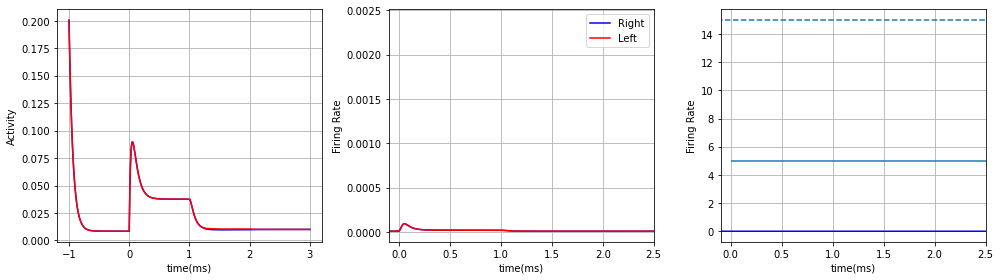

In [43]:
fig = plt.figure(figsize=(14,4))
plt.subplot(131)
plt.plot(time,S_R,'-',color='blue',label='Right Activity')
plt.plot(time,S_L,'-',color='red',label='Left Activity')

#plt.plot([0,1],[0,1],':k')
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Activity')
#plt.xlim((-100,1500))


plt.subplot(132)

plt.plot(time,f(S_R),'-',color='blue',label="Right")
plt.plot(time,f(S_L),'-',color='red',label="Left")
#plt.hlines(15,-100,1500,linestyles='dashed',label='Threshold')
#plt.hlines(5,0,1000,color='black',label='Stimulus')
#plt.vlines(RT,0,30,color='black',linestyles='dashed',label='Reaction Time')

plt.xlim((-100/1000,2500/1000))


plt.grid()
#plt.xlim((-100,1500))
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate')
plt.legend()


#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.subplot(133)

plt.plot(time,f(S_R)-f(S_L),'-',color='blue',label="Right-Left")
plt.hlines(15,-100,1500,linestyles='dashed',label='Threshold')
plt.hlines(5,0,800)
plt.grid()
plt.xlim((-100/1000,2500/1000))
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate')


plt.tight_layout()
plt.show()


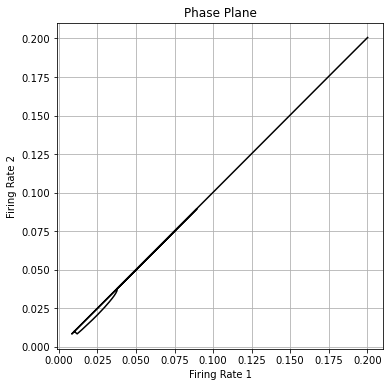

In [10]:
Firing_target_R=f(S_R)
Firing_target_L=f(S_L)

fig = plt.figure(figsize=(6,6))
#plt.plot(Firing_target_L,Firing_target_R,'-',color='black')
plt.plot(S_L,S_R,'-',color='black')



#plt.plot([0,20],[0,20],':')
plt.grid()
plt.xlabel('Firing Rate 1')
plt.ylabel('Firing Rate 2')
plt.title('Phase Plane')
plt.axis('square')
plt.show()



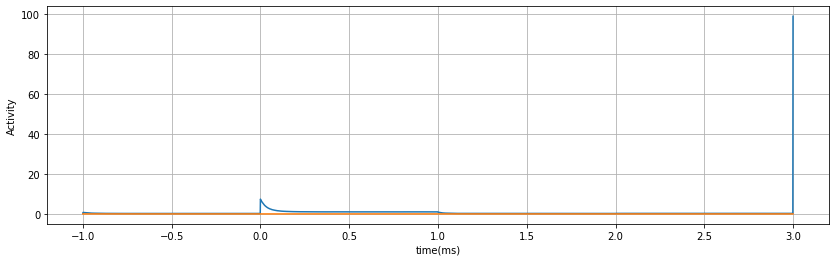

In [11]:
fig = plt.figure(figsize=(14,4))

#plt.plot(time,f(0.3725 *0.2-0.1137*S_R+I_T+I_input_1(10)+0.3297+I_noise_L))

#plt.plot(time,f(0.3725*0.2-0.1137*0.2+I_T+I_input_1(10)+I_noise_L))
plt.plot(time,f(x_R))
plt.plot(time,f(S_R))

#plt.plot([0,1],[0,1],':k')
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Activity')
#plt.xlim((-100,1500))

plt.show()

## References
Wong KF, Wang XJ. A recurrent network mechanism of time integration in perceptual decisions. J Neurosci. 2006 Jan 25;26(4):1314-28. doi: 10.1523/JNEUROSCI.3733-05.2006. PMID: 16436619; PMCID: PMC6674568.